## Checking NCIt coverage of Disease Items in CiVIC Records

In [32]:
from disease.query import QueryHandler
from disease.schemas import MatchType
import json
from disease import PROJECT_ROOT
from collections import defaultdict
civic_file = open(PROJECT_ROOT / 'analysis' / 'civic-data' / 'civic-metakb-evidence.json', 'r')
civic = json.load(civic_file)
pmkb_file = open(PROJECT_ROOT / 'analysis' / 'pmkb-data' / 'pmkb-metakb-evidence.json', 'r')
pmkb = json.load(pmkb_file)
querier = QueryHandler(db_url='http://localhost:8000')

***

### With db loading all items with semantic type="Neoplastic Process":

In [45]:
missed_ev_count = 0
missed_terms = defaultdict(lambda: 0)

civic_match_counts = {m: 0 for m in MatchType.__members__.values()}

for ev in civic:
    disease_object = ev.get('disease')
    if disease_object:
        disease_name = disease_object.get('name')
        disease_display_name = disease_object.get('display_name')
        match = False
        highest_match = MatchType.NO_MATCH
        if disease_name:
            name_result = querier.search_sources(disease_name, keyed=True)
            if len(name_result['source_matches']['NCIt']['records']) > 0:
                match = True
                match_type = name_result['source_matches']['NCIt']['match_type']
                if match_type > highest_match:
                    highest_match = match_type
        if disease_display_name:
            display_name_result = querier.search_sources(disease_display_name, keyed=True)
            if len(display_name_result['source_matches']['NCIt']['records']) > 0:
                match = True
                match_type = name_result['source_matches']['NCIt']['match_type']
                if match_type > highest_match:
                    highest_match = match_type
        
        civic_match_counts[highest_match] += 1
        if not match:
            missed_terms[disease_name] += 1
            missed_ev_count += 1

print(f'Unique terms not matched to NCIt neoplastic process terms: {len(missed_terms.keys())}')

Unique terms not matched to NCIt neoplastic process terms: 83


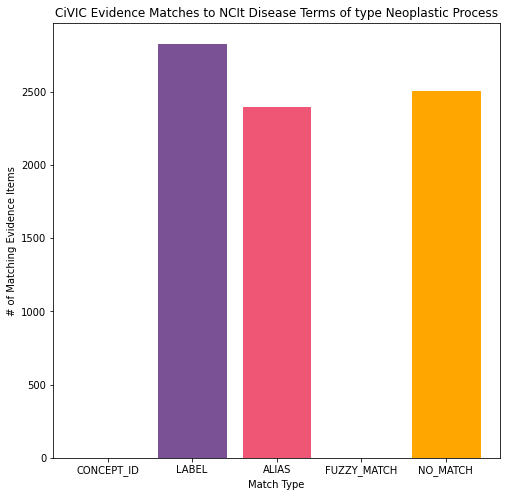

In [46]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8, 8))

indices = [m for m in MatchType.__members__.keys()]

p1 = plt.bar(indices, civic_match_counts.values())
plt.xlabel('Match Type')
plt.ylabel('# of Matching Evidence Items')
p1[1].set_color('#7a5195')
p1[2].set_color('#ef5675')
p1[4].set_color('#ffa600')
plt.title('CiVIC Evidence Matches to NCIt Disease Terms of type Neoplastic Process')
plt.savefig('civic_counts_neoplastic_process.png', facecolor='white')
plt.show()


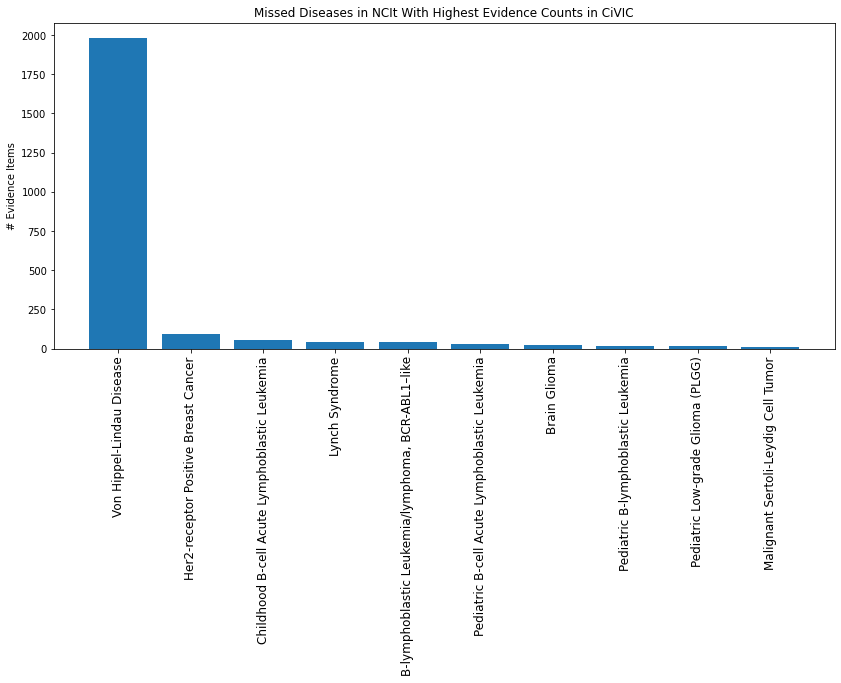

In [62]:
fig = plt.figure(figsize=(14, 6))
miss_counts_sorted = sorted([(k,v) for k,v in missed_terms.items()], key=lambda x: x[1], reverse=True)[:10]
misses_xs = [m[0] for m in miss_counts_sorted]
misses_ys = [m[1] for m in miss_counts_sorted]
p1 = plt.bar(misses_xs, misses_ys)
plt.xticks(rotation=90, fontsize=12)
plt.title('Missed Diseases in NCIt With Highest Evidence Counts in CiVIC')
plt.ylabel('# Evidence Items')
plt.savefig('civic_top_missed_diseases_neopl_process.png', facecolor='white')
plt.show()

***

## With DB loading all items of type "Neoplastic Process" and "Disease or Syndrome"

In [64]:
missed_ev_count_dos = 0
missed_terms_dos = defaultdict(lambda: 0)

civic_match_counts_dos = {m: 0 for m in MatchType.__members__.values()}

for ev in civic:
    disease_object = ev.get('disease')
    if disease_object:
        disease_name = disease_object.get('name')
        disease_display_name = disease_object.get('display_name')
        match = False
        highest_match = MatchType.NO_MATCH
        if disease_name:
            name_result = querier.search_sources(disease_name, keyed=True)
            if len(name_result['source_matches']['NCIt']['records']) > 0:
                match = True
                match_type = name_result['source_matches']['NCIt']['match_type']
                if match_type > highest_match:
                    highest_match = match_type
        if disease_display_name:
            display_name_result = querier.search_sources(disease_display_name, keyed=True)
            if len(display_name_result['source_matches']['NCIt']['records']) > 0:
                match = True
                match_type = name_result['source_matches']['NCIt']['match_type']
                if match_type > highest_match:
                    highest_match = match_type
        
        civic_match_counts_dos[highest_match] += 1
        if not match:
            missed_terms_dos[disease_name] += 1
            missed_ev_count_dos += 1

print(f'Unique terms not matched to NCIt neoplastic process + disease or syndrome terms: {len(missed_terms_dos.keys())}')

Unique terms not matched to NCIt neoplastic process + disease or syndrome terms: 74


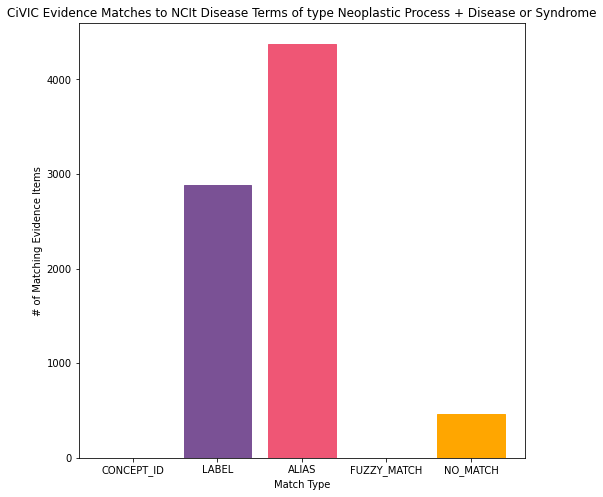

In [65]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8, 8))

indices = [m for m in MatchType.__members__.keys()]

p1 = plt.bar(indices, civic_match_counts_dos.values())
plt.xlabel('Match Type')
plt.ylabel('# of Matching Evidence Items')
p1[1].set_color('#7a5195')
p1[2].set_color('#ef5675')
p1[4].set_color('#ffa600')
plt.title('CiVIC Evidence Matches to NCIt Disease Terms of type Neoplastic Process + Disease or Syndrome')
plt.savefig('civic_counts_neoplastic_process_dos.png', facecolor='white')
plt.show()

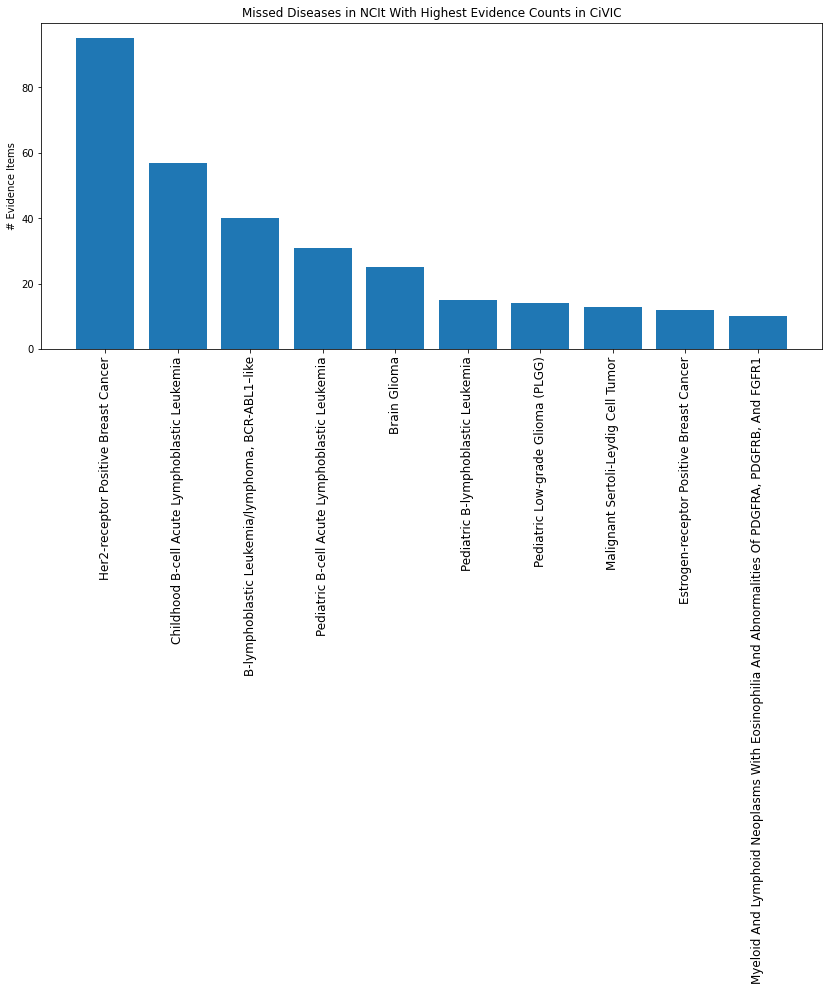

In [66]:
fig = plt.figure(figsize=(14, 6))
miss_counts_sorted_dos = sorted([(k,v) for k,v in missed_terms_dos.items()], key=lambda x: x[1], reverse=True)[:10]
misses_xs_dos = [m[0] for m in miss_counts_sorted_dos]
misses_ys_dos = [m[1] for m in miss_counts_sorted_dos]
p1 = plt.bar(misses_xs_dos, misses_ys_dos)
plt.xticks(rotation=90, fontsize=12)
plt.title('Missed Diseases in NCIt With Highest Evidence Counts in CiVIC')
plt.ylabel('# Evidence Items')
plt.savefig('civic_top_missed_diseases_neopl_process_dos.png', facecolor='white')
plt.show()

In [68]:
sorted([(k,v) for k,v in missed_terms_dos.items()], key=lambda x: x[1], reverse=True)

[('Her2-receptor Positive Breast Cancer', 95),
 ('Childhood B-cell Acute Lymphoblastic Leukemia', 57),
 ('B-lymphoblastic Leukemia/lymphoma, BCR-ABL1–like', 40),
 ('Pediatric B-cell Acute Lymphoblastic Leukemia', 31),
 ('Brain Glioma', 25),
 ('Pediatric B-lymphoblastic Leukemia', 15),
 ('Pediatric Low-grade Glioma (PLGG)', 14),
 ('Malignant Sertoli-Leydig Cell Tumor', 13),
 ('Estrogen-receptor Positive Breast Cancer', 12),
 ('Myeloid And Lymphoid Neoplasms With Eosinophilia And Abnormalities Of PDGFRA, PDGFRB, And FGFR1',
  10),
 ('Pediatric B-cell Lymphoblastic Leukemia', 9),
 ('Triple-receptor Negative Breast Cancer', 8),
 ('Ovarian Clear Cell Carcinoma', 7),
 ('Precursor B Lymphoblastic Lymphoma/leukemia', 7),
 ('Pediatric Acute Megakaryoblastic Leukemia (AMKL)', 6),
 ('Her2-receptor Negative Breast Cancer', 6),
 ('Follicular Thyroid Carcinoma', 6),
 ('Adult B-Lymphoblastic Leukemia', 6),
 ('Anaplastic Thyroid Carcinoma', 5),
 ('Langerhans-Cell Histiocytosis', 5),
 ('Brain Medullobl